In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


import sys
import os

sys.path.append(os.path.abspath('/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main'))
from src import kmeans_clustering

In [62]:
df = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/scaled_processed_dataset.csv")

In [ ]:
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_) # Append the squared distance of each cluster to their centroid

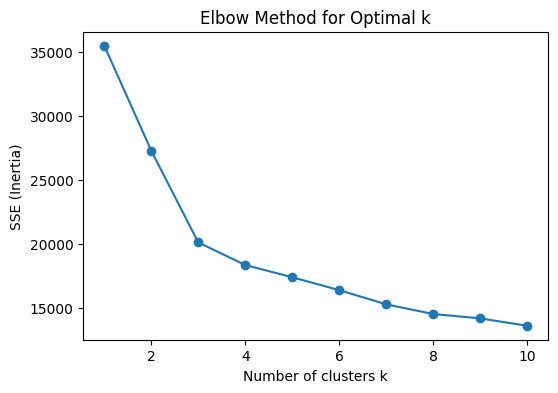

In [64]:
plt.figure(figsize = (6 , 4))
plt.plot(K_range, sse, marker = 'o')
plt.xlabel("Number of clusters k")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [65]:
k_optimal = 3
kmeans = KMeans(n_clusters = k_optimal, random_state=42)
labels = kmeans.fit_predict(df)

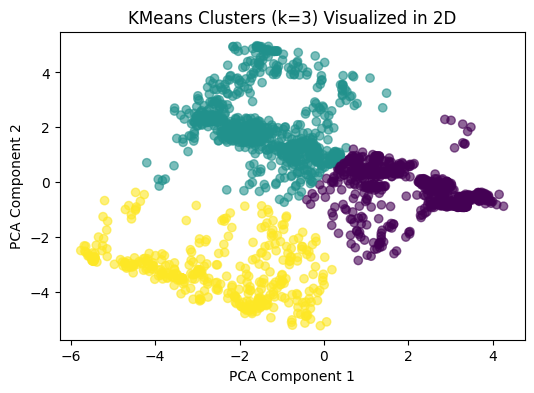

In [68]:
df['cluster'] = labels
pca = PCA(n_components = 2) #Fit all the features into n_components number of axes
X_pca = pca.fit_transform(df)
plt.figure(figsize=(6,4))
plt.scatter(X_pca[: , 0], X_pca[: , 1], c = labels, cmap = 'viridis', alpha = 0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"KMeans Clusters (k = {k_optimal}) Visualized in 2D")
plt.show()